### Data Loading, getting cuda

In [1]:
import torch
import torchvision
from data_loader import get_train_valid_loader

batch_size = 16
data_path = './data/train_labeled'
resize_size = 224
crop_size = 224
train_loader, valid_loader, test_loader, classes = get_train_valid_loader(data_path, batch_size, True, resize_size, crop_size)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Net initialization

In [2]:
from nets.vgg import create_vgg

net = create_vgg()
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): 

### Init net weights from file (optional)

In [8]:
net_state_path = ''
net.load_state_dict(torch.load(net_state_path))

FileNotFoundError: [Errno 2] No such file or directory: './vgg-sm-drop.pth'

### Set fixed seed (optional)

In [3]:
import torch
seed = 0
torch.manual_seed(seed)

### Start training if you didn't load net state from file

In [ ]:
from train import train
import torch 
print(f'Seed: {torch.initial_seed()}')

lr = 0.002
momentum = 0.9
num_epochs = 20
calc_train_acc = False
accs_valid, losses, accs_train = train(net, train_loader, valid_loader, num_epochs, lr, 
                                       momentum, device, calc_train_acc)
print('Finished Training')

Seed: 311688545765700


### Save net weights to file (optional)

In [9]:
save_path = './vgg-transfer.pth'
torch.save(net.state_dict(), save_path)

### Evaluate net on test set 

In [4]:
net.eval()
from results import get_accuracy, get_accuracy_classes
print(f'accuracy on test set: {get_accuracy(net, test_loader, device)}')

classes_accuracy = get_accuracy_classes(net, test_loader, len(classes), device, batch_size)

for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], classes_accuracy[i]))

accuracy on test set: 82.62666666666667
Accuracy of airplane : 84 %
Accuracy of automobile : 93 %
Accuracy of  bird : 79 %
Accuracy of   cat : 64 %
Accuracy of  deer : 80 %
Accuracy of   dog : 68 %
Accuracy of  frog : 86 %
Accuracy of horse : 85 %
Accuracy of  ship : 91 %
Accuracy of truck : 92 %


### Plot accuracies

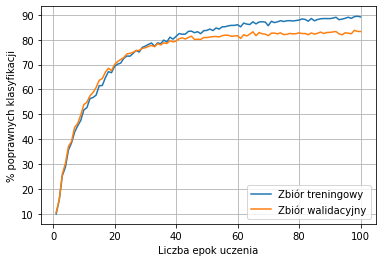

In [5]:
from graph_creator import draw_accuracy_train_valid
draw_accuracy_train_valid(accs_valid, accs_train)


### Plot loss

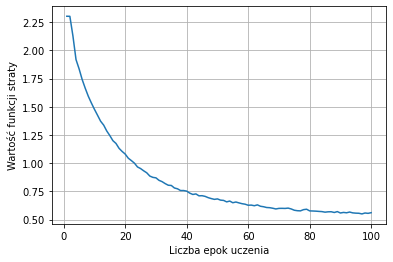

In [6]:
from graph_creator import draw_loss
draw_loss(losses)

### Plot classes accuracies

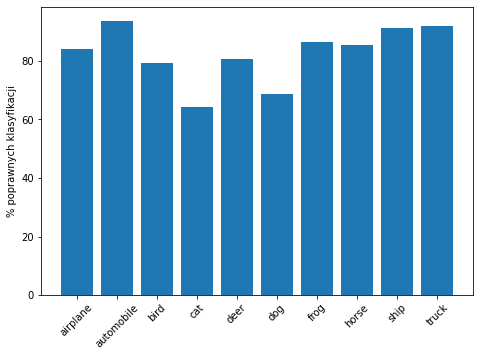

In [7]:
from graph_creator import draw_accuracies_classes
draw_accuracies_classes(classes, classes_accuracy)